0.6840579710144927


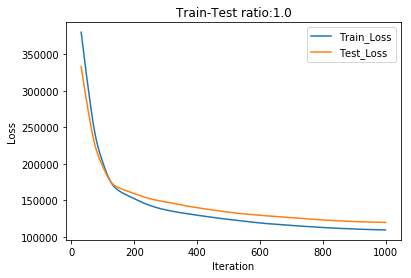

In [2]:
# -*- coding: utf-8 -*-
from numpy import *;
import numpy as np
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

def get_data():
    data = load_svmlight_file("australian_scale.txt")
    return data[0], data[1]

X, y = get_data()
X=X.toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
y_train=mat(y_train).T
y_test=mat(y_test).T

X_train=mat(np.c_[np.ones(len(X_train)),X_train])
X_test=mat(np.c_[np.ones(len(X_test)),X_test])

w=mat(random.random((X_train.shape[1],1)))

x=[]
y1=[]
y2=[]
C=1000

for i in range(0,1000):
    der=0
    fault=0
    yTrain=yTest=w.T*w/2
    for j in range(0,X_train.shape[0]):
        yTrain=yTrain+C*max(0,1-y_train[j]*w.T*X_train[j].T)
        if(1-y_train[j]*w.T*X_train[j].T>=0):
            der=der-C*y_train[j].T*X_train[j]
        else:
            pass
    for j in range(0,X_test.shape[0]):
        yTest=yTest+C*max(0,1-y_test[j]*w.T*X_test[j].T)
        if(y_test[j]*(X_test[j]*w-y_test[j])>0):
            fault+=1
    "print(fault/X_test.shape[0])"
    der=der+w.T
    der_avarage=der/X_train.shape[0]
    w=w-1e-5*der_avarage.T
    if i>30:
        x.append(i)
        y1.append(yTrain[0,0])
        y2.append(yTest[0,0])
print(fault/X_test.shape[0])
plt.plot(x,y1, label='Train_Loss')
plt.plot(x,y2, label='Test_Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train-Test ratio:'+str(len(X_train)/len(X_test)))
plt.legend()
plt.show()
